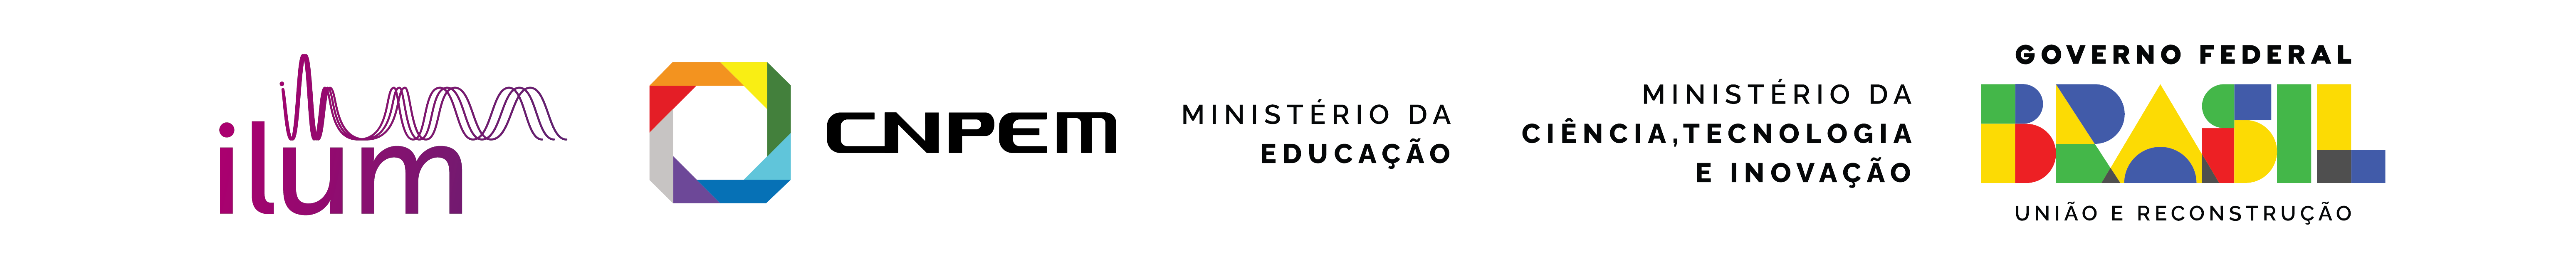

## <center> PREVISÃO DO TEMPO DE SÍNTESE DE MOF's <br><br> Modelo Final 🎊 </center>

Projeto final da disciplina `Aprendizado de Máquina` do 2° período do Bacharelado em `Ciência e Tecnologia` da *Ilum Escola de Ciência (Centro Nacional de Pesquisa em Energia e Materiais)*.

<b> Professor: </b> Daniel Cassar<br>
<b> Semestre: </b> 2024.2 <br>
<b> Turma: </b> 2024 <br>
<b> Grupo: </b> 6 - Arautos da Crepúsculo <br>
<b> Integrantes: </b> Feérica Lyra (*Letícia Nunes*), Mística Luz (*Rafaela Luz*) e Druida Thomaleq (*Thomas Hannemann*) <br>

### Bibliotecas

In [1]:
import pandas as pd

# Para a construção do modelo
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Para as métricas
from sklearn.metrics import mean_squared_error

### Sumário

1. Introdução
2. Modelo final
3. Métricas
4. Conclusão
5. Referências

---

## 1. Introdução

Após a avaliação entre os três algoritmos, chegamos a um modelo que conferiu os melhores resultados. O algoritmo que é de $k$-NN, considerando seleção de atributos feita pelo fator de inflação da variância. Este caderno é dedicado a quem quer o produto final de forma rápida e concisa! 🏎️

## 2. Modelo Final 

#### Carregando os dados

In [2]:
df_treino = pd.read_csv('RAC_treino_VIF.csv')

df_teste = pd.read_csv('RAC_teste_split.csv')
df_teste = df_teste.drop(columns = ['mof'])

#### Instanciando o normalizador

In [3]:
normalizador = StandardScaler()

#### Instanciando o regressor $k$-NN

In [4]:
modelo_knn = KNeighborsRegressor() # O número de vizinhos padrão é k = 5

#### Definindo os atributos e target, de treino e teste

In [5]:
df_feat = df_treino.drop(columns = ['time'])
FEATURES = df_feat.columns
TARGET = ['time']

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel() 

# Para o teste do modelo
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

#### Normalizando os atributos de treino

In [6]:
normalizador.fit(X_treino)

X_treino_norm = normalizador.transform(X_treino)

#### Treinando o modelo

In [7]:
modelo_knn.fit(X_treino_norm, y_treino)

KNeighborsRegressor()

#### Normalizando os atributos de teste

In [8]:
X_teste_norm = normalizador.transform(X_teste)

#### Realizando as previsões

In [9]:
previsoes = modelo_knn.predict(X_teste_norm)
previsoes

array([ 67.2,  36. ,  36. ,  96. ,  72. ,  72. ,  67.2,  86.4,  52.2,
        62.4,  72. ,  72. ,  93.6, 108.8,  67.2,  46.8,  45.6,  72. ,
        43.2,  62.4,  91.2,  64.8,  48. ,  43.2,  91.2,  62.4,  62.4,
        48. ,  81.6,  36. ,  74.4,  86.4,  86.4, 124.8,  57.6,  86.4,
        54.8,  29.6,  62.4,  41.6,  72. ,  52.8,  96. ,  31.2,  28.8,
        38.4,  76.8,  56.6,  50.4,  67.2,  69.6,  72. , 105.6,  31. ])

## 3. Métricas

#### MSE (Erro Quadrático Médio)

In [11]:
y_verdadeiro = y_teste
y_previsto = previsoes

MSE = mean_squared_error(y_verdadeiro, y_previsto)

print(f"O MSE do modelo foi de {MSE}")

O MSE do modelo foi de 3591.353333333333


#### RMSE (Raiz do Erro Quadrado Médio)

In [12]:
RMSE = mean_squared_error(y_verdadeiro, y_previsto, squared=False)

print(f"O RMSE do modelo foi de {RMSE} horas.")

O RMSE do modelo foi de 59.92790112571383 horas.


## 4. Conclusão

Com os dados, métodos de seleção, algoritmos e métricas escolhidas, o melhor resultado que obtivemos foi um erro de $\approx$ 60h. 

## 5. Referências

1. <b>Utilização do `KNeighborsRegressor`</b>: ATP-203 2.1 - Aprendizado de máquina, k-NN e métricas (notebook didático feito por Daniel Cassar)
2. <b>Normalização para calcular distâncias</b>: https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn